# Homework 1

## Ron Vogel

*** Converting .Rmd to .ipynb file  ***

Change directory to location of .Rmd file

Install and use sos-rmarkdown and run these commands in Terminal
> pip install sos-rmarkdown  
> sos convert HW1.Rmd HW1.ipynb

### Some informative viewing
I highly recommend watching this series by 3blue1brown to get a sense of what matrix operations are from a vector space perspective and how to visualize them: [Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) .  So far, we will cover the first 4 videos in the series, the rest are enrichment ...or review if you've already done statistics.  We might cover topics like convolution and polynomial multiplication when we get to deep learning, which are a bit different from the vector representation of matrices.  The foundation you build here will be helpful then.

### Matrix Multiplication (2.5pts)

You are a linear algebra expert from Youtube university and have been hired by a local space cadet to help them navigate some vector spaces. They have provided you with the following matrices:

In [1]:
# import necessary modules
import os
import numpy as np
import pandas as pd

In [2]:
# create arrays in numpy
# A <- matrix(c(1, 2, 3, 4, 5, 6), nrow = 2, byrow = TRUE)
# B <- matrix(c(7, 8, 9, 10, 11, 12), nrow = 3, byrow = TRUE)

A = np.array([[1, 2, 3, 4, 5, 6]])
A = A.reshape(2, 3)

B = np.array([[7, 8, 9, 10, 11, 12]])
B = B.reshape(3, 2)
print("A = \n", A)
print("B = \n", B)


A = 
 [[1 2 3]
 [4 5 6]]
B = 
 [[ 7  8]
 [ 9 10]
 [11 12]]


1. Compute the matrix product \(C = AB\). What are the dimensions of \(C\)? (0.5pts)

In [3]:
# Create matrix product of A and B
C = np.matmul(A, B)  # compute matrix product using np.matmul
print("The matrix product of A and B is:\n", C)  # print result
print("The dimension of C is:", C.shape)

The matrix product of A and B is:
 [[ 58  64]
 [139 154]]
The dimension of C is: (2, 2)


2. Compute the outer product of the first column of \(A\) with the first row of \(B\). What is the result? (0.5pts)

In [158]:
# Compute outer product of first column of A and first row of B
D = np.outer(A[:, 0], B[0, :])  # use np.outer for outer product of first column of A and first row of B
print("The outer product of the first column of A and the first row of B is:\n", D)  #print result
print("The dimension of D is:", D.shape)

The outer product of the first column of A and the first row of B is:
 [[ 7  8]
 [28 32]]
The dimension of D is: (2, 2)


3. Verify that the matrix product \(C\) can be expressed as a sum of outer products of the columns of \(A\) and the rows of \(B\). (0.5pts)

In [4]:
# We need to compute the outer products of the first column of A and first row of B, second column of A and second row of B, and third column of A and third row of B
# Then sum these 3 outer products to get the matrix product C 

# Compute outer product of first column A and first row of B
D = np.outer(A[:, 0], B[0, :])  # use np.outer for outer product of first column of A and first row of B
print(D)

# Compute outer product of second column A and second row of B
E = np.outer(A[:, 1], B[1, :])  # use np.outer for outer product of second column of A and second row of B
print(E)

# Compute outer product of third column A and third row of B
F = np.outer(A[:, 2], B[2, :])  # use np.outer for outer product of third column of A and third row of B
print(F)

sum_matrix = D + E + F # sum of all outer products
print("The sum of all outer products is:\n", sum_matrix)
print("The dimension of the sum matrix is:", sum_matrix.shape)
# The sum of all outer products should equal the dot product C
print("Does the sum of all outer products equal the matrix product C?", np.array_equal(sum_matrix, C))

[[ 7  8]
 [28 32]]
[[18 20]
 [45 50]]
[[33 36]
 [66 72]]
The sum of all outer products is:
 [[ 58  64]
 [139 154]]
The dimension of the sum matrix is: (2, 2)
Does the sum of all outer products equal the matrix product C? True


4. Explain in your own words the relationship between matrix multiplication and outer products. (0.5pts)

Matrix multiplication of A x B  requires that the number of columns in matrix A ( n x p) must be equal to the number of rows in matrix B (p x k). The rows of A will have same number of elements as the columns of B so that the two elements can multiplied in stepwise fashion to arrive at a product matrix.

The outer product allows one to define matrix multiplication as the sum of individual outer products, the sum of p outer products where p is  the number of columns in matrix A ( n x p) or number of rows in matrix B (p x k).  The outer product of column i and row i from 0 to p.  

5. Implement a function that takes two matrices as input and returns their product using the outer product method. (0.5pts)

In [5]:
#  sum of outer products of the columns of A and the rows of B
sum_matrix = np.zeros((A.shape[0], B.shape[1]))  # Initialize a zero matrix with the correct shape
for i in range(A.shape[1]):  # Loop over the columns of A (or rows of B)
    outer_product = np.outer(A[:, i], B[i, :])  # Compute the outer product of the i-th column of A and i-th row of B
    sum_matrix += outer_product  # Add the outer product to the sum matrix

print("The sum of all outer products using loop is:\n", sum_matrix)
print("The dimension of the sum matrix using loop is:", sum_matrix.shape)

# The sum of all outer products should equal the dot product C
print("Does the sum of all outer products using loop equal the matrix multiplication product C?", np.array_equal(sum_matrix, C))

The sum of all outer products using loop is:
 [[ 58.  64.]
 [139. 154.]]
The dimension of the sum matrix using loop is: (2, 2)
Does the sum of all outer products using loop equal the matrix multiplication product C? True


In [6]:
# Implement a function that takes two matrices as input and returns their product using the outer product method

def matrix_multiply(A, B):
    if A.shape[1] != B.shape[0]: # Check if the number of columns in A equals the number of rows in B
        raise ValueError("Number of columns in A must be equal to number of rows in B") # Return an error if dimensions do not match
    
    sum_matrix = np.zeros((A.shape[0], B.shape[1]))  # Initialize a matrix with the correct shape with zeroes 
    for i in range(A.shape[1]):  # Loop over the columns of A (or rows of B)
        outer_product = np.outer(A[:, i], B[i, :])  # Compute the outer product of the i-th column of A and i-th row of B
        sum_matrix += outer_product  # Add the outer product to the sum matrix
    return sum_matrix


In [7]:
# assign the result of the function to a matrix and print the result
result = matrix_multiply(A, B)
print("The result of matrix multiplication using the outer product method is:\n", result)


The result of matrix multiplication using the outer product method is:
 [[ 58.  64.]
 [139. 154.]]


### Chick-Weight (7.5pts)
You are a farmer named Bob and your chickens are getting too fat.  Analyze the ChickWeight dataset in R before your chickens get taken away by the ASPCA. Your task is to explore the relationship between diet and weight gain over time in chicks. Perform the following analyses:

Load the ChickWeight dataset and display its structure.  If it's not already included, you can load the attached chick_weight.csv

In [8]:
# load modules
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns

In [9]:
# load chick_weight.csv data
chick_data = pd.read_csv('chick_weight.csv')
print(chick_data.head())

#display structure of data
print(chick_data.info())
# display summary statistics of data
print(chick_data.describe())    

   Unnamed: 0  weight  Time  Chick  Diet
0           1      42     0      1     1
1           2      51     2      1     1
2           3      59     4      1     1
3           4      64     6      1     1
4           5      76     8      1     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  578 non-null    int64
 1   weight      578 non-null    int64
 2   Time        578 non-null    int64
 3   Chick       578 non-null    int64
 4   Diet        578 non-null    int64
dtypes: int64(5)
memory usage: 22.7 KB
None
       Unnamed: 0      weight        Time       Chick        Diet
count  578.000000  578.000000  578.000000  578.000000  578.000000
mean   289.500000  121.818339   10.717993   25.750865    2.235294
std    166.998503   71.071960    6.758400   14.568795    1.162678
min      1.000000   35.000000    0.000000    1.000000    1.000000
25%

1. Create a summary table showing the average weight of chicks for each diet at each time point. (0.5pts)

In [10]:
# 1. Create a summary table showing the average weight of chicks for each diet at each time point
summary_table = chick_data.groupby(['Diet', 'Time']).agg(Mean_Weight=('weight', 'mean')).reset_index() # use groupby and agg functions to calculate mean weight for each diet and time point
print(summary_table)    

    Diet  Time  Mean_Weight
0      1     0    41.400000
1      1     2    47.250000
2      1     4    56.473684
3      1     6    66.789474
4      1     8    79.684211
5      1    10    93.052632
6      1    12   108.526316
7      1    14   123.388889
8      1    16   144.647059
9      1    18   158.941176
10     1    20   170.411765
11     1    21   177.750000
12     2     0    40.700000
13     2     2    49.400000
14     2     4    59.800000
15     2     6    75.400000
16     2     8    91.700000
17     2    10   108.500000
18     2    12   131.300000
19     2    14   141.900000
20     2    16   164.700000
21     2    18   187.700000
22     2    20   205.600000
23     2    21   214.700000
24     3     0    40.800000
25     3     2    50.400000
26     3     4    62.200000
27     3     6    77.900000
28     3     8    98.400000
29     3    10   117.100000
30     3    12   144.400000
31     3    14   164.500000
32     3    16   197.400000
33     3    18   233.100000
34     3    20   258

2. Visualize the weight gain over time for each diet using a line plot with error bars representing the standard error of the mean. (0.5pts)

### I added error bars in Seaborn, but it does not render error bars , so we need to calculate them separately. 

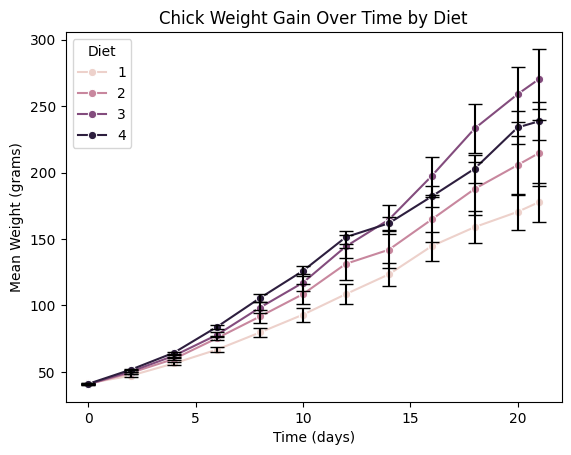

In [11]:
#*** Seaborn does not support error bars directly, so we need to calculate them separately. ***

# Calculate standard error of the mean for each diet at each time point and use it in a new dataframe

# use groupby and agg functions to  calculate mean weight and SEM for each diet and time point 
summary_sem = chick_data.groupby(['Diet', 'Time']).agg(Mean_Weight=('weight', 'mean'), SEM=('weight', 'sem')).reset_index() 

# Use Matplotlib's errorbar function on the Axes object returned by your Seaborn plot.
ax = sns.lineplot(data=summary_sem, x='Time', y='Mean_Weight', hue='Diet', marker='o')
ax.errorbar(x=summary_sem['Time'], y=summary_sem['Mean_Weight'], yerr=summary_sem['SEM'], fmt='none', c='black', capsize=5)
# Customize the plot
ax.set_title('Chick Weight Gain Over Time by Diet')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Mean Weight (grams)')
ax.legend(title='Diet')
plt.show()

3. Use the ggcorrplot package to create a correlation heatmap of the numeric variables in the dataset.  Convert the diet column to dummy variables (columns) and include them in the correlation analysis. (1pts)

In [12]:
# Convert the diet column in chick_data to dummy variables (columns) 

# *** Note, we can use drop_first=True to avoid multicollinearity, but I did not think it is necessary ***
diet_dummies = pd.get_dummies(chick_data['Diet'], prefix='Diet', drop_first=False, dtype=int)  # convert 'Diet' column to dummy variables

# Concatenate the dummy variables to the original dataframe
chick_data_dummy = pd.concat([chick_data, diet_dummies], axis=1)  # concatenate along columns

# remove the original Diet column
chick_data_dummy.drop('Diet', axis=1, inplace=True)  # remove the original 'Diet' column

# remove the Chick column becuase it is an identifier column
chick_data_dummy.drop('Chick', axis=1, inplace=True)  #  

# remove the first column that was created when reading the csv file
chick_data_dummy.drop(chick_data_dummy.columns[0], axis=1, inplace=True)  # remove the first column because this is an index column

print(chick_data_dummy.head())  # display the first few rows of the modified dataframe


   weight  Time  Diet_1  Diet_2  Diet_3  Diet_4
0      42     0       1       0       0       0
1      51     2       1       0       0       0
2      59     4       1       0       0       0
3      64     6       1       0       0       0
4      76     8       1       0       0       0


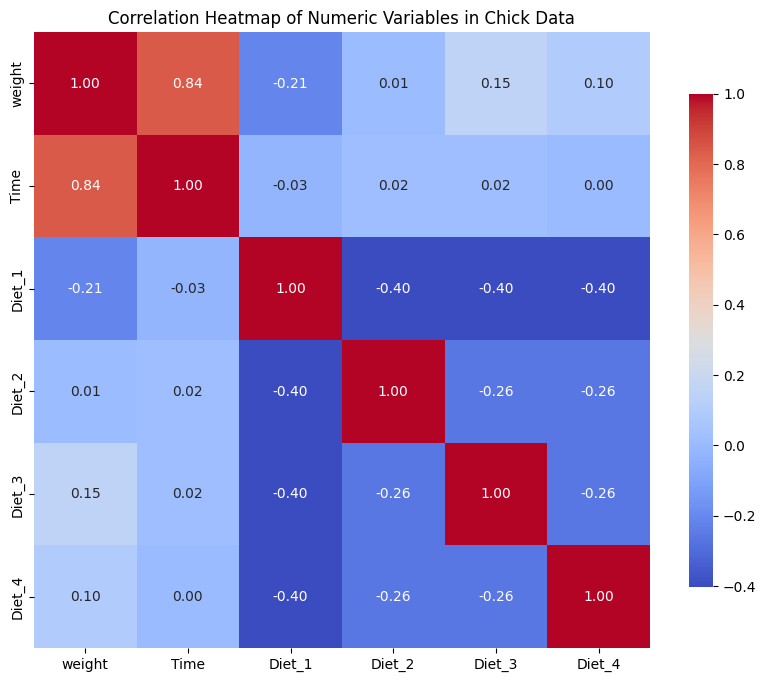

In [13]:
# Now create a correlation heatmap of the numeric variables in the dataset

numeric_cols = chick_data_dummy.select_dtypes(include=[np.number])  # select only numeric columns from df
corr = numeric_cols.corr()    # create a correlation matrix of numeric columns
plt.figure(figsize=(10, 8))  # set figure size
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}) # create heatmap with annotations
plt.title('Correlation Heatmap of Numeric Variables in Chick Data') # add title
plt.show()

Calculate a slope coefficient for each diet and time combination using a custom function.  HINT:  use the lm() function inside calculate slope and add 0+ in the front of the independent variables to get slopes for all but no intercept4.  s, otherwise the lm function will drop one of the diet columns to avoid collinearity. (1pts)

In [14]:
# Group by diet and calculate slope coefficients for time vs weight for each Diet
# We use the chick_data dataframe, not the chick_data_dummy dataframe

import statsmodels.formula.api as smf

chick_data_diet = chick_data.groupby('Diet')  # group by Diet

def calculate_slope(data):
    model = smf.ols('weight ~ 0 + Time', data=data).fit()  # fit linear model without intercept
    slopes = model.params  # extract slope coefficients
    return slopes

# Apply the function to each diet group
slopes= chick_data_diet.apply(calculate_slope) # call the function with the chick_data_diet dataframe

# Convert the slopes to a DataFrame for better visualization
slopes_df = slopes.reset_index()  # reset index to convert Series to DataFrame
slopes_df.columns = ['Diet', 'Slope']  # rename columns
print("Slope coefficient for each Diet:")
print(slopes_df)  # print the DataFrame of slopes


Slope coefficient for each Diet:
   Diet      Slope
0     1   8.929575
1     2  10.502625
2     3  12.629732
3     4  11.774316


C:\Users\vogel\AppData\Local\Temp\ipykernel_32736\3815515958.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes= chick_data_diet.apply(calculate_slope) # call the function with the chick_data_diet dataframe


5.  Write a function that calculates residual sum of squares (RSS), and then compare the minimal value to find the optimal slopes for each parameter and parameter combination. (1pts)

In [16]:
# We first create a function to calculate the residual sum of squares (RSS) for each model with arguments of actual and predicted values and Model name
def calculate_rss(y_true, y_pred, model_name):
    rss = np.sum((y_true - y_pred) ** 2)  # calculate RSS
    print(f"The Function calculates RSS for {model_name} = {rss:,.2f}")  # print RSS
    return rss

In [25]:
# Now we first create 4 linear regression models to predict weight as a function of Time and Diet
# Model1: weight as a function of Time only
# Model2: weight as a function of Diet only
# Model3: weight as a function of Time and Diet (no interaction)
# Model4: weight as a function of Time, Diet, and Time*Diet interaction
     

# Model1: use LinearRegression to predict weight as a function of Time using the chick_data_dummy dataframe
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Define features and target variable
X = chick_data_dummy[['Time']]  # feature is Time
y = chick_data_dummy['weight']   # target is Weight


# Create a LinearRegression model
model1 = LinearRegression()

# Fit the model
model1.fit(X, y)

# Make predictions for y using Time only
y_pred_time = model1.predict(X)   # predict weight using Time only - we will use for the RSS function 

# Evaluate the model RSS
rss1 = mean_squared_error(y, y_pred_time) * len(X)  # calculate RSS
print(f"Using LineraRegression package, the Model1 RSS = {rss1:.2f}")

# Call functiion to calculate RSS for Model1
rss1 = calculate_rss(y, y_pred_time, "Model1 (Time only)")




Using LineraRegression package, the Model1 RSS = 872212.18
The Function calculates RSS for Model1 (Time only) = 872,212.18


In [24]:
# Model2: use LinearRegression to predict Weight as a function of Diet using the chick_data_dummy dataframe
model2 = LinearRegression()
X = chick_data_dummy[['Diet_1', 'Diet_2', 'Diet_3', 'Diet_4']]  # features are the Diet dummy variables
y = chick_data_dummy['weight']   # target is Weight

# Fit the model
model2.fit(X, y)
# Make predictions for y using Diet only
y_pred_diet = model2.predict(X)   # predict weight using Diet only - we will use for the RSS function

# Evaluate the model RSS
rss1 = mean_squared_error(y, y_pred_diet) * len(X)  # calculate RSS
print(f"Using LineraRegression package, the Model1 RSS = {rss2:.2f}")

# Call functiion to calculate RSS for Model1
rss2 = calculate_rss(y, y_pred_diet, "Model2 (Diet only)")



Using LineraRegression package, the Model1 RSS = 2758693.27
The Function calculates RSS for Model2 (Diet only) = 2,758,693.27


In [26]:
# Model3: use LinearRegression to predict Weight as a function of Time + Diet (addtive effects) using the chick_data_dummy dataframe
# Define features and target variable
X = chick_data_dummy.drop('weight', axis=1)  # features are all columns except weight
y = chick_data_dummy['weight']   # target is weight
# Create a LinearRegression model
model3 = LinearRegression()
# Fit the model
model3.fit(X, y)

# Make predictions for y using Time + Diet
y_pred_diet_plus_time = model3.predict(X)


# Evaluate the model RSS
rss3 = mean_squared_error(y, y_pred_diet_plus_time) * len(X)  # calculate RSS
print(f"Using LineraRegression package, the Model3 RSS = {rss3:.2f}")

# Call functiion to calculate RSS for Model1
rss3 = calculate_rss(y, y_pred_diet_plus_time, "Model3 (Time + Diet)")

Using LineraRegression package, the Model3 RSS = 742336.12
The Function calculates RSS for Model3 (Time + Diet) = 742,336.12


In [28]:
# Model4: use LinearRegression to predict Weight as a function of Time X Diet (associative effects) using the chick_data_dummy dataframe

# Define features and target variable
X = chick_data_dummy.drop('weight', axis=1)  # features are all columns except weight
y = chick_data_dummy['weight']   # target is weight

# Create interaction terms between Time and each Diet dummy variable    
for diet in diet_dummies.columns: # loop over each diet dummy variable and create interaction term
    X[f'Time_X_{diet}'] = X['Time'] * X[diet]  # create interaction term by multiplying Time with each diet dummy variable

# Create a LinearRegression model
model4 = LinearRegression()  
# Fit the model
model4.fit(X, y)

# Make predictions for y using Time * Diet interaction
y_pred_diet_times_time = model4.predict(X)

# Evaluate the model RSS
rss4 = mean_squared_error(y, y_pred_diet_times_time) * len(X)  # calculate RSS
print(f"Using LineraRegression package, the Model4 RSS = {rss4:.2f}")

# Call functiion to calculate RSS for Model1
rss4 = calculate_rss(y, y_pred_diet_times_time, "Model4 (Time * Diet)")



Using LineraRegression package, the Model4 RSS = 661532.03
The Function calculates RSS for Model4 (Time * Diet) = 661,532.03


### The RSS for the Weight ~ Time * Diet model is the lowest of the 4 models at 661,532.

You can loop through different models and calculate RSS for each  
to find the optimal slopes for each parameter and parameter combination.    
You can work through it manually as well

6.  Use anova to compare the RSS to see if they're significant -- compare the F statistic.  Use the built in anova function.  (0.5pts)


In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#create 4 arrays representing the predicted weights from each model
Pred_Model1 = np.array(y_pred_time)  # add predictions from Model1
Pred_Model2 = np.array(y_pred_diet)  # add predictions from Model2
Pred_Model3 = np.array(y_pred_diet_plus_time)  # add predictions from Model3
Pred_Model4 = np.array(y_pred_diet_times_time)  # add predictions from Model4

# Run ANOVA
anova_results = stats.f_oneway(Pred_Model1, Pred_Model2, Pred_Model3, Pred_Model4)  # perform one-way ANOVA using scipy.stats.f_oneway on the 4 arrays with predicted weights

# print f statistic and p-value with 2 decimal places
print(f"F-statistic = {anova_results.statistic:.2f}")
print(f"p-value = {anova_results.pvalue:.2e}")

F-statistic = 0.00
p-value = 1.00e+00


### We have a low F-statistic, so these RSS are not significant.

7. Fit a linear model to assess the effect of diet and time on weight.  Use backwards selection to find the best model just against the p-values of the coefficients.  Use the same approach with the 0 + leading the independent variables to ensure all lines are present. (1pts)

In [30]:
# Fit a linear model to assess the effect of diet and time on weight and use backwards selection to find the best model just against the p-values of the coefficients.
# Do not add an intercept because we have dummy variables for all categories of Diet

import statsmodels.formula.api as smf

model_backwards = smf.ols('weight ~ 0 + Diet_1 + Diet_2 + Diet_3 + Diet_4 + Time', data=chick_data_dummy).fit()  # fit linear model without intercept

# get the p-values of the coefficients and check for highest p-value to remove (over p = .05 threshold)
p_values = model_backwards.pvalues
print("P-values of the coefficients:\n", p_values)




P-values of the coefficients:
 Diet_1     1.218886e-03
Diet_2     7.418376e-11
Diet_3     3.595277e-28
Diet_4     4.116781e-22
Time      1.803038e-165
dtype: float64


## All values are less than .05, so we do not need to remove any variables 

In [31]:
# **** As part of my research on backwards selection, I found a function to perform backwards elimination based on 
# **** p-values of the coefficients and adapdted it here

import statsmodels.api as sm

# Use a while loop to perform backward elimination based on p-values
def backward_elimination(df, target, initial_features, significance_level=0.05):
    features = list(initial_features)   
    while True:
        model = sm.OLS(df[target], df[features]).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            removed_feature = p_values.idxmax()
            features.remove(removed_feature)
            print(f"Removed '{removed_feature}' (p-value: {max_p_value:.4f})")
        else:
            print("Backward elimination complete. All remaining features are significant.")
            break
    return model, features

# Define the target and initial features
target_variable = 'weight'
# Include all dummy variables for Diet and the Time variable
initial_predictors = ['Diet_1', 'Diet_2', 'Diet_3', 'Diet_4', 'Time']

# Perform backward selection
final_model, final_features = backward_elimination(chick_data_dummy, target_variable, initial_predictors)

# Print the final model summary
print("\nFinal Model Summary:")
print(final_model.summary())

# Print the final features
print("\nFinal selected features:", final_features)

Backward elimination complete. All remaining features are significant.

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     419.2
Date:                Wed, 17 Sep 2025   Prob (F-statistic):          1.44e-168
Time:                        21:28:37   Log-Likelihood:                -2888.8
No. Observations:                 578   AIC:                             5788.
Df Residuals:                     573   BIC:                             5809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

8. Iteratively enhance with backwards selection.  When the F statistic becomes insignificant, stop.  Do not use the step function, implement your own F test based backwards selection. (1pts)

In [32]:
# ************************ # ITERATION 1: use all variables************************
#  Iteratively enhance with above model with backwards selection.  When the F statistic becomes insignificant, stop

# Fit a linear model to assess the effect of diet and time on weight and use backwards selection to find the best model just against the p-values of the coefficients.
# Do not add an intercept because we have dummy variables for all categories of Diet

import statsmodels.formula.api as smf

# ITERATION 1: use all variables

model_backwards_f = smf.ols('weight ~ 0 + Diet_1 + Diet_2 + Diet_3 + Diet_4 + Time', data=chick_data_dummy).fit()  # fit linear model without intercept

# get the p-values of the coefficients and check for highest p-value to remove (over p = .05 threshold)
p_values = model_backwards_f.pvalues
print("P-values of the coefficients:\n", p_values)

# Check the overall model significance (F-statistic p-value)
f_pvalue = model_backwards_f.f_pvalue
print(f"Overall model F-statistic p-value: {f_pvalue:.4e}")


P-values of the coefficients:
 Diet_1     1.218886e-03
Diet_2     7.418376e-11
Diet_3     3.595277e-28
Diet_4     4.116781e-22
Time      1.803038e-165
dtype: float64
Overall model F-statistic p-value: 1.4407e-168


### The f statistic is already smaller than the critical F value, so we should just stop here becuase the results are not signficannt. 

I will step through the next iteration for illustraive purposes. 

In [35]:
# ************************ # ITERATION 2: remove DIET1  because it has highest p************************
#  Iteratively enhance with above model with backwards selection.  When the F statistic becomes insignificant, stop

# Fit a linear model to assess the effect of diet and time on weight and use backwards selection to find the best model just against the p-values of the coefficients.
# Do not add an intercept because we have dummy variables for all categories of Diet

# ITERATION 2: remove DIET1

model_backwards_f = smf.ols('weight ~ 0 + Diet_2 + Diet_3 + Diet_4 + Time', data=chick_data_dummy).fit()  # fit linear model without intercept

# get the p-values of the coefficients and check for highest p-value to remove (over p = .05 threshold)
p_values = model_backwards_f.pvalues
print("P-values of the coefficients:\n", p_values)

# Check the overall model significance (F-statistic p-value)
f_pvalue = model_backwards_f.f_pvalue
print(f"Overall model F-statistic p-value: {f_pvalue:.4e}")

P-values of the coefficients:
 Diet_2     1.314648e-08
Diet_3     2.059311e-26
Diet_4     5.348308e-20
Time      1.573758e-239
dtype: float64
Overall model F-statistic p-value: 0.0000e+00


In [36]:
# ************************ # ITERATION 3: remove DIET2  because it has highest p************************
#  Iteratively enhance with above model with backwards selection.  When the F statistic becomes insignificant, stop

# Fit a linear model to assess the effect of diet and time on weight and use backwards selection to find the best model just against the p-values of the coefficients.
# Do not add an intercept because we have dummy variables for all categories of Diet

# ITERATION 3: remove DIET2

model_backwards_f = smf.ols('weight ~ 0 + Diet_3 + Diet_4 + Time', data=chick_data_dummy).fit()  # fit linear model without intercept

# get the p-values of the coefficients and check for highest p-value to remove (over p = .05 threshold)
p_values = model_backwards_f.pvalues
print("P-values of the coefficients:\n", p_values)

# Check the overall model significance (F-statistic p-value)
f_pvalue = model_backwards_f.f_pvalue
print(f"Overall model F-statistic p-value: {f_pvalue:.4e}")

P-values of the coefficients:
 Diet_3     2.099005e-21
Diet_4     1.264586e-15
Time      6.929728e-271
dtype: float64
Overall model F-statistic p-value: 0.0000e+00


In [37]:
# ************************ # ITERATION 4: remove DIET4  because it has highest p************************
#  Iteratively enhance with above model with backwards selection.  When the F statistic becomes insignificant, stop

# Fit a linear model to assess the effect of diet and time on weight and use backwards selection to find the best model just against the p-values of the coefficients.
# Do not add an intercept because we have dummy variables for all categories of Diet

# ITERATION 4: remove DIET4

model_backwards_f = smf.ols('weight ~ 0 + Diet_3 + Time', data=chick_data_dummy).fit()  # fit linear model without intercept

# get the p-values of the coefficients and check for highest p-value to remove (over p = .05 threshold)
p_values = model_backwards_f.pvalues
print("P-values of the coefficients:\n", p_values)

# Check the overall model significance (F-statistic p-value)
f_pvalue = model_backwards_f.f_pvalue
print(f"Overall model F-statistic p-value: {f_pvalue:.4e}")


P-values of the coefficients:
 Diet_3     3.074332e-15
Time      1.454674e-291
dtype: float64
Overall model F-statistic p-value: 3.9693e-320


In [38]:
# ************************ # ITERATION 5: remove DIET3  because it has highest p************************
#  Iteratively enhance with above model with backwards selection.  When the F statistic becomes insignificant, stop

# Fit a linear model to assess the effect of diet and time on weight and use backwards selection to find the best model just against the p-values of the coefficients.
# Do not add an intercept because we have dummy variables for all categories of Diet

# ITERATION 5: remove DIET3

model_backwards_f = smf.ols('weight ~ 0 + Time', data=chick_data_dummy).fit()  # fit linear model without intercept

# get the p-values of the coefficients and check for highest p-value to remove (over p = .05 threshold)
p_values = model_backwards_f.pvalues
print("P-values of the coefficients:\n", p_values)

# Check the overall model significance (F-statistic p-value)
f_pvalue = model_backwards_f.f_pvalue
print(f"Overall model F-statistic p-value: {f_pvalue:.4e}")

# mode 

P-values of the coefficients:
 Time    1.350813e-308
dtype: float64
Overall model F-statistic p-value: 1.3508e-308


9. Create a quadratic line with just weight vs time (quadratic vs linear) -- calculate RSS with results from quadratic to see if it's better. (0.5pts)

In [39]:
# Create a quadratic model  predict weight as a function of Time using the chick_data_dummy dataframe

import statsmodels.formula.api as smf

model_quadratic = smf.ols('weight ~ 0 + Time + I(Time**2)', data=chick_data_dummy).fit()  # fit quadratic model without intercept


# calculate the RSS for the quadratic model
y_pred_quadratic = model_quadratic.predict(chick_data)  # predict weight using the quadratic model
rss_quadratic = calculate_rss(chick_data['weight'], y_pred_quadratic, "Quadratic Model (Time + Time^2)")

# Call functiion to calculate RSS for Model1 (linear model with Time only)
rss1 = calculate_rss(y, y_pred_time, "Linear Model1 (Time)")




The Function calculates RSS for Quadratic Model (Time + Time^2) = 979,262.39
The Function calculates RSS for Linear Model1 (Time) = 872,212.18


### RSS for linear model is lower.

10.  Generate a null model of chick-weight to hypothetically use for forwards selection. (0.5pts)

In [185]:
# Create a null  model to predict weight as a function of Time using the chick_data_dummy dataframe (model with intercept only  and no predictors)

import statsmodels.formula.api as smf

model_null = smf.ols('weight ~ 1', data=chick_data_dummy).fit()  # fit null model with intercept only

# Print the summary of the null model
print(model_null.summary())

# calculate the RSS for the null model
y_pred_null = model_null.predict(chick_data_dummy)  # predict weight using the null model
rss_null = calculate_rss(chick_data_dummy['weight'], y_pred_null, "Null Model (Intercept Only)")


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                nan
Time:                        23:53:59   Log-Likelihood:                -3284.1
No. Observations:                 578   AIC:                             6570.
Df Residuals:                     577   BIC:                             6574.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    121.8183      2.956     41.208      0.0

### Bonus:  Show that slope of linear regression is pearsons correlation r times the ratio of standard deviations for a simple linear model. (1pts)

You can show it analytically by mashing together the equations for ß_1 and r, or you can show it numerically by simulating some data and fitting a linear model and calculating the correlation coefficient and standard deviations.

The equation for sd(X) in terms of sum of squares is:
$$
s_x = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2}
$$
where \(X\) is the predictor variable, \(n\) is the number of observations, and \(\bar{X}\) is the mean of \(X\).

The equation for sd(Y) in terms of sum of squares is:
$$
s_y = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2}
$$
where \(Y\) is the response variable, \(n\) is the number of observations, and \(\bar{Y}\) is the mean of \(Y\).

The equation for cov(X,Y) is:
$$
cov(X, Y) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})
$$
where \(X\) is the predictor variable, \(Y\) is the response variable, \(n\) is the number of observations, and \(\bar{X}\) and \(\bar{Y}\) are the means of \(X\) and \(Y\), respectively.


The equation to calculate pearson's correlation is:
$$
r = \frac{cov(X, Y)}{s_x s_y}
$$
where \(cov(X, Y)\) is the covariance between the predictor variable \(X\) and the response variable \(Y\), \(s_x\) is the standard deviation of \(X\), and \(s_y\) is the standard deviation of \(Y\).

The numerical equation for ß_1 in a simple linear regression is:
$$
\beta_1 = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}
$$


The symbolic representation of the same equation is:
$$
\beta_1 = \frac{cov(X, Y)}{s_x^2}
$$
where \(cov(X, Y)\) is the covariance between the predictor variable \(X\) and the response variable \(Y\), and \(s_x^2\) is the variance of \(X\).


Can you prove the following by apply in algebra with the equations above:
$$
\beta_1 = r \frac{s_y}{s_x}
$$
where \(r\) is Pearson's correlation coefficient, \(s_y\) is the standard deviation of the response variable, and \(s_x\) is the standard deviation of the predictor variable.

Write the solution by hand and upload a photo of your proof; or, if using a numerical comparison, submit the code here:

### See attached solution.